# ISE 447 - Financial Optimization - HW 3

## Jack Dean

## Lehigh University

Due Date: Sunday April 17th, 2022  
Total: 82 Points

In [1]:
'''
Packages Used
'''
import numpy as np
import pandas as pd
import scipy.stats as stats
import pulp
from pulp import *
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1 - From non-linear to linear formulation (20 Points)
In this question, when we refer to variance, we mean population variance.  Consdier a discrete random variable $X$ whose values can be $x_i$ for $i\in\{1,2,\dots,T\}$, each with a probability $\frac{1}{T}$ for some $T\in\mathbb{N}$.  One can define the *mean absolute deviation* (MAD) of $X$ as
$$\mathrm{MAD}(X) = \frac{1}{T}\sum_{t=1}^T |x_t-\bar{X}|$$
where $\bar{X}$ denotes the expected value of $X$.  That is
$$\bar{X} = \frac{1}{T}\sum_{t=1}^Tx_t$$
Notice that the population variance of $X$ is given by
$$\mathrm{Var}(X) = \frac{1}{T}\sum_{t=1}^T (x_t-\bar{X})^2$$
Thus, much like the variance, the MAD penalizes deviations of the random variable from its mean. However, while the variance penalizes these deviations by squaring them, it uses the absolute value. This means that MAD can be used (and has been used) in optimal portfolio allocation problems as a measure of risk that serves as an alternative to using variances as a measure of risk (as in the Markowitz portfolio optimization problem discussed in class). The objective of this problem is to derive a linear programming (LP) formulation for the MAD portfolio allocation problem.

### Part (a) (5 Points)
For the random variable $X$ described above, what is the general value of
$$\frac{1}{T}\sum_{t=1}^T(x_t-\bar{X})$$
What does this result tell you about how both the variance and MAD are defined?  
*Hint*: You might try to compute the expression above first for a particular discrete random variable; for example, one whose potential values are $−3, −1, 5, 10, 15$, each with probability $\frac{1}{5}

### Part (b) (5 Points)
For given values $a$, $b$, consider the univariatre optimization problem:
$$\min |x_1-a| + |x_2-a|$$
$$\mathrm{s.t.}\;x_1+x_2=b$$
$$x_i\geq0\;\forall i$$
By using a technique similar to the one used in class to model transaction costs with linear constraints in the Markowitz portfolio allocation problem, reformulate the problem above as a linear program.  
*Hint*: introduce two additional auxiliary decision variables to represent $|x_1 − a|$, and $|x_2 − a|$

### Part (c) (10 Points)
The MAD portfolio allocation model is similar to the Markowitz portfolio allocation model, but isntead of variance of the portfolio returns, the risk measure is defined by the MAD of the portfolio returns.  Specifically, the MAD portfolio allocation model is given by
$$\min \frac{1}{T}\sum_{t=1}^T|\sum_{i=1}^nr_{i,t}x_i - \sum_{i=1}^n\mu_ix_i|$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$\sum_{i=1}^nx_i=1$$
$$x_i\geq0 \; \forall i$$
where $x_i$ represents the allocation to asset $i$, $\mu_i$ represents expected return of asset $i$, and $r_{i,t}$ represents the $t$ sample value of the return of asset $i$, for $i\in\{1,2,\dots,T\}$. Also, $\mu_0$ is the riskaversion parameter (as in the Markowitz model).

Derive a linear programming formulation for the MAD portfolio allocation model.

**Note**: It is worth to mention that:  
* The fact that the MAD portfolio allocation model can be formulated as an LP is an advantage over the Markowitz model (which requires the solution of a convex QP)  
* One disadvantage however, is that the MAD portfolio allocation model does not “depend” on the correlation between the asset returns of different assets  
* But is is known that if the asset returns normal, independent normal distributions, then solving the MAD model or the Markowitz model is equivalent (a fact that you could test)  


### Solution to Part (a)

This value will tend to 0, which is shown in the following code block.  This suggests that the variance and MAD are defined such that they can measure spread from the mean as the general spread accounting for positives and negatives will tend to 0.

In [2]:
'''Given Example'''
ex_set = np.array([-3,-1,5,10,15])
ex_T = len(ex_set)
ex_mean = np.mean(ex_set)
ex_val = (1/ex_T) * np.sum(np.array([ex_set[i] - ex_mean for i in range(ex_T)]))

'''Generic Example'''
gen_T = 50000
gen_set = np.random.randint(0,10000,gen_T)
gen_mean = np.mean(gen_set)
gen_val = (1/gen_T) * np.sum(np.array([gen_set[i]-gen_mean for i in range(gen_T)]))

'''Print Results'''
print('The value of the given example is {:.1f}'.format(ex_val))
print('The value of the generic example is {:.1f}'.format(gen_val))

The value of the given example is 0.0
The value of the generic example is -0.0


### Solution to Part (b)
We wish to rewrite $|x_i-a|=y_i$ for $i\in\{1,2\}$. We redefine the problem as follows.
$$\min y_1 + y_2$$
$$\mathrm{s.t.} x_1+x_2=b$$
$$x_1-a\leq y_1$$
$$a-x_1\leq y_1$$
$$x_2-a\leq y_2$$
$$a-x_2\leq y_2$$
$$x_i,y_i\geq0\;\forall i\in\{1,2\}$$

### Solution to Part (c)
I begin by rewriting the problem as follows
$$\min \frac{1}{T}\sum_{t=1}^T\sum_{i=1}^n|r_{i,t} - \mu_i|x_i$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$\sum_{i=1}^nx_i=1$$
$$x_i\geq0 \; \forall i$$
Now, for all $i\in\{1,\dots,n\}$ and $t\in\{1,\dots,T\}$, we wish to let $y_{i,t}=|r_{i,t}-\mu_i|x_i$.  We rewrite the problem to reflect this as

$$\min \frac{1}{T}\sum_{t=1}^T\sum_{i=1}^n y_{i,t}$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$x_i(r_{i,t}-\mu_i)\leq y_{i,t}$$
$$x_i(\mu_i-r_{i,t})\leq y_{i,t}$$
$$\sum_{i=1}^nx_i=1$$
$$x_i\geq0 \; \forall i,\;\;\;y_{i,t}\geq0\;\forall i \forall t$$

## Problem 2 - From non-linear to linear formulation (20 Points)
In this question, when we refer to variance, we mean population variance.  Consdier a discrete random variable $X$ whose values can be $x_i$ for $i\in\{1,2,\dots,T\}$, each with a probability $\frac{1}{T}$ for some $T\in\mathbb{N}$.  One can define the *downside semi-variance* ($\mathrm{var}^-$) of $X$ as
$$\mathrm{Var}^-(X) = \frac{1}{T}\sum_{t=1}^T (\min\{0,x_t-\bar{X}\})^2$$
where $\bar{X}$ denotes the expected value of $X$.  That is
$$\bar{X} = \frac{1}{T}\sum_{t=1}^Tx_t$$
Notice that the population variance of $X$ is given by
$$\mathrm{Var}(X) = \frac{1}{T}\sum_{t=1}^T (x_t-\bar{X})^2$$
Thus, much like the variance, the downside semi-variance penalizes deviations of the random variable from its mean. However, while the variance penalizes both deviations above and below the mean value of the random variable, the semi-variance only penalizes the deviations below the mean of the random variable. The downside semi-variance can be used (and has been used) in optimal portfolio allocation problems as a measure of risk that serves as an alternative to using variances as a measure of risk (as in the Markowitz portfolio optimization problem discussed in class). The objective of this problem is to derive a quadratic programming (QP) formulation for the downside semivariance portfolio allocation problem.

### Part (a) (5 Points)
Consider the data given in the Excel file `HWQ2_Data.xls`.  Consider these values to be the sample returns of a portfolio of assets at different times.  
* Produce a Histogram of the distribution of the given portfolio asset returns using your favourite software tool.  
* For the portfolio return data given compute the mean return, the variance of the returns, the downside semivariance of the returns. Do you think that in this case, the downside semivariance is a better measure of risk that the variance? Briefly explain why your answer is yes or no.  
* Using your favourite software tool, generate 200 samples of a Normal distribution with mean $\mu=1$ and standard deviation $\sigma=2$. Generate a histogram of the distribution of the samples. Also, compute both the variance and the downside semivariance of the samples. Can you infer something from the values of the variance and downside semivariance in this case? Briefly explain.

### Part (b) (5 Points)
For given values $a$, $b$, consider the univariate optimization problem:
$$\min \min\{0,x_1-a\}^2 + \min\{0,x_2-a\}^2$$
$$\mathrm{s.t.}\;x_1+x_2=b$$
$$x_i\geq0\;\forall i$$
By using a technique similar to the one used in class to model short selling constraints in the Markowitz portfolio allocation problem, reformulate the problem above as a quadratic program  
*Hint*: introduce two additional auxiliary decision variables to represent $\min\{0,x_1−a\}$, and $\min\{0,x_2−a\}$.

### Part (c) (10 Points)
The downside semivariance portfolio allocation model is similar to the Markowitz portfolio allocation model, but isntead of variance of the portfolio returns, the risk measure is defined by the downside semivariance of the portfolio returns.  Specifically, the downside semivariance portfolio allocation model is given by
$$\min \frac{1}{T}\sum_{t=1}^T\min\{0,\sum_{i=1}^nr_{i,t}x_i - \sum_{i=1}^n\mu_ix_i\}^2$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$\sum_{i=1}^nx_i=1$$
$$x_i\geq0 \; \forall i$$
where $x_i$ represents the allocation to asset $i$, $\mu_i$ represents expected return of asset $i$, and $r_{i,t}$ represents the $t$ sample value of the return of asset $i$, for $i\in\{1,2,\dots,T\}$. Also, $\mu_0$ is the riskaversion parameter (as in the Markowitz model).  Derive a quadratic programming formulation for the downside semivariance portfolio allocation model.

### Solution to Part (a)



In [3]:
'''
import data for question
'''
q2 = pd.read_excel('HWQ2_Data.xlsx').to_numpy().squeeze()
q2_bps = np.array([float(q2[i]) for i in range(len(q2))])

C:\Users\jdean\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

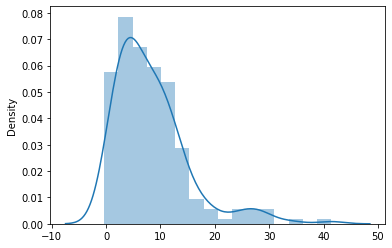

In [4]:
'''
Histogram
'''
sns.distplot(q2_bps)

In [5]:
def downside_semi_variance(data):
    '''
    Returns the Downside Semi Variance of the Data Set  
    ---  
    Parameters:  
    data - (np array) Data array to calculate the dsv  
    ---  
    Returns:  
    dsv - (float) Downside Semi Variance
    '''
    vals = np.where(data - np.mean(data) < 0, data - np.mean(data), 0)
    dsv = (1/len(data))*np.sum(np.square(vals))
    return dsv

In [6]:
'''
Calculate Fields
'''
bps_mu = np.mean(q2_bps)
bps_var = np.var(q2_bps)
bps_dsv = downside_semi_variance(q2_bps)

'''
print values
'''
print('The mean is {:.2f}'.format(bps_mu))
print('The variance is {:.2f}'.format(bps_var))
print('The Downside Semi Variance is {:.2f}'.format(bps_dsv))

The mean is 8.33
The variance is 46.70
The Downside Semi Variance is 13.78


The sample mean is 1.15
The sample variance is 4.30
The dample Downside Semi Variance is 2.08


C:\Users\jdean\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

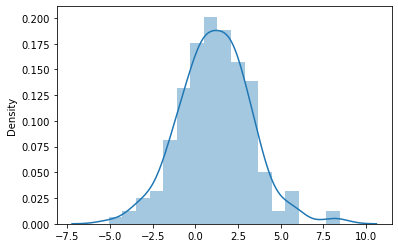

In [7]:
'''
Produce data
'''
mu=1
sigma=2
normals = mu + sigma*np.random.randn(200)

'''
Calculate Fields
'''
norm_mu = np.mean(normals)
norm_var = np.var(normals)
norm_dsv = downside_semi_variance(normals)

'''
print values
'''
print('The sample mean is {:.2f}'.format(norm_mu))
print('The sample variance is {:.2f}'.format(norm_var))
print('The dample Downside Semi Variance is {:.2f}'.format(norm_dsv))

sns.distplot(normals)

### Solution to Part (b)
we wish to rewrite $\min\{0,x_i-a\}^2=y_i$ for $i\in\{1,2\}$.  We rewrite the problem as follows.
$$\min y_1^2 + y_2^2$$
$$\mathrm{s.t.}\;x_1+x_2=b$$
$$y_1\leq0$$
$$y_1\leq x_1-a$$
$$y_2\leq0$$
$$y_2\leq x_2-a$$
$$x_i\geq0\;\forall i$$

### Solution to Part (c)

I begin by rewriting the program as follows

$$\min \frac{1}{T}\sum_{t=1}^T\min\{0,\sum_{i=1}^n(r_{i,t}-\mu_i)x_i\}^2$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$\sum_{i=1}^nx_i=1$$
$$x_i\geq0 \; \forall i$$
I wish to represent $\min\{0,\sum_{i=1}^n(r_{i,t}-\mu_i)x_i\}=y_t$.  Therefore I reformulate the problem as follows
$$\min \frac{1}{T}\sum_{t=1}^Ty_t^2$$
$$\mathrm{s.t.} \sum_{i=1}^n\mu_ix_i\geq\mu_0$$
$$\sum_{i=1}^nx_i=1$$
$$y_t\leq0 \;\; \forall t$$
$$y_t\leq\sum_{i=1}^n(r_{i,t}-\mu_i)x_i\;\; \forall t$$
$$x_i\geq0 \; \forall i$$

## Problem 3 - Solving the Markowitz Portfolio Allocation Model (Based on exercises 6.6 and 6.7 in the textbook) (25 Points)

The Excel spreadsheet `HWQ3_Data.xls` contains estimated expected return values and variance-covariance values of monthly returns of a set of 20 large-cap stocks from the S&P 500 Index.  In answering each of the questions below, make sure to include print-outs of your computer work

### Part (a) (5 points) 
Use your favourite solver to find the minimum variance portfolio (i.e., without setting a minimum expected return constraint) with long-only positions. What is the composition of the minimum variance portfolio? what is its expected return?  
*Hint*: its $\mu^Tx^*$, where $x^*$ is the minimum variance portfolio.  

### Part (b) (10 points) 
Use your favourite solver to find the solution to the classical Markowitz portfolio allocation model (i.e., only long positions, and with a minimum expected return constraint). Solve your model for at least six (6) different levels of the expected return ranging from the expected return level you found in the previus question (for the minimum variance portfolio), to the expected return level for which there are feasible portfolios. What is this maximum expected return value? Use your results to construct an efficient frontier for the portfolios.

### Part (c) (5 points) 
Assume that currently, you hold a portfolio on the 20 assets in which $\frac{1}{20} = 5\%$ of the money is invested in each of the assets (i.e., and equally weighted portfolio). Using what we learned about modeling transaction and/or turnover constraints, find a Markowitz portfolio, by setting $\mu_0 = 20$, and adding the constraint that the new portfolio should not incur in a higher than $70\%$ turnover with respect with the current portfolio you hold (i.e., the equally weighted portfolio).

### Part (d) (5 points) 
Following the model described in class, find the portfolio with the maximum Sharpe ratio. What is the expected return and variance of this portfolio? Where in the efficient frontier you computed earlier on is this portfolio located?


### Solution to Part (a)



In [8]:
'''
Data Import
'''
ret = pd.read_excel('HWQ3_Data.xlsx', sheet_name='returns')
cov = pd.read_excel('HWQ3_Data.xlsx', sheet_name='covariance', index_col='Unnamed: 0')
dec_var_names = cov.index.to_list()

In [9]:
import quadprog

### Solution to Part (b)



### Solution to Part (c)



### Solution to Part (d)



## Problem 4 - Positive Semidefinite Matrices (8 Points)
For each of the following matrices, state whether the matrix is positive semidefinite or not, and briefly explain why. Avoid using a computation of the eigenvalues, instead, try to use the characterizations we discussed in class:  
### Part (a)
$$\begin{pmatrix}
 1 & 0 & 0 \\
 0 & 0 & 0 \\
 0 & 0 & \frac{2}{3} \\
\end{pmatrix}$$
### Part (b)
$$\begin{pmatrix}
 7 & -2 & 0 \\
 -2 & 1 & 0 \\
 0 & 0 & -\frac{2}{3} \\
\end{pmatrix}$$
### Part (c)
$$\begin{pmatrix}
 10 & 1 & 1 \\
 1 & 8 & -2 \\
 1 & -2 & 6 \\
\end{pmatrix}$$
### Part (d)
$$\begin{pmatrix}
 0 & -1 & 0 \\
 -1 & 8 & -2 \\
 0 & -2 & 6 \\
\end{pmatrix}$$


In [10]:
def positive_semi_definite(A, print_result=True):
    '''
    Tests if the Matrix A is positive semidefinite  
    ---
    Parameters:  
    A - (matrix-like) Square matrix to be tests  
    print_result - (bool) Prints result for presentation (default True)
    ---
    Returns:  
    psd - (bool) True if PSD, else false [ONLY RETURNS WHEN print_result=False]
    '''
    import numpy.linalg as npl
    eigen = npl.eig(A)[0] >= 0
    psd = sum(eigen) == len(A)
    if print_result:
        if psd:
            print('The given matrix is Positive Semi Definite')
        else:
            print('The matrix is not Positive Semi Definite')
    else:
        return psd

### Solution to Part (a)

In [11]:
A = np.array([
             [1,0,0],
             [0,0,0],
             [0,0,2/3]
             ])

positive_semi_definite(A)

The given matrix is Positive Semi Definite


### Solution to Part (b)

In [12]:
A = np.array([
             [7,-2,0],
             [-2,1,0],
             [0,0,-2/3]
             ])

positive_semi_definite(A)

The matrix is not Positive Semi Definite


### Solution to Part (c)

In [13]:
A = np.array([
             [10,1,1],
             [1,8,-2],
             [1,-2,6]
             ])

positive_semi_definite(A)

The given matrix is Positive Semi Definite


### Solution to Part (d)

In [14]:
A = np.array([
             [0,-1,0],
             [-1,8,-2],
             [0,-2,6]
             ])

positive_semi_definite(A)

The matrix is not Positive Semi Definite


## Problem 5 - Quadtratic Expressions (4 Points)
For each of the following functions, state whether the function is quadratic and if it is, find the vector $x$, the matrix $Q$, the vector $c$, and the number $d$ such that one can write $f(x)=x^TQx+c^Tx+d$.
### Part (a)
$$f(x_1,x_2,x_3)=(3x_1-2x_2)^2-x_3(x_2-1)$$
### Part (b)
$$f(x_1,x_2,x_3)=(x_1-3x_2+2x_3-5)^2$$

### Solution to Part (a)

The function can be rewritten as
$$\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}^T \begin{pmatrix}
9 & -12 & 0\\
-12 & 4 & -1\\
0 & -1 & 0
\end{pmatrix}\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix} + \begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}^T\begin{pmatrix}
0\\
0\\
1
\end{pmatrix} + 0$$
We check to see if the $Q$ matrix is PSD.

In [15]:
Q = np.array([
             [9,-12,0],
             [-12,4,-1],
             [0,-1,0]
             ])

positive_semi_definite(A)

The matrix is not Positive Semi Definite


Since the matrix is not PSD, this is not a quadratic program

### Solution to Part (b)
The function can be rewritten as
$$\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}^T \begin{pmatrix}
1 & -6 & 4\\
-6 & 4 & -12\\
4 & -12 & 9
\end{pmatrix}\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix} + \begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}^T\begin{pmatrix}
-10\\
20\\
-30
\end{pmatrix} + 25$$
We check to see if the $Q$ matrix is PSD.

In [16]:
Q = np.array([
             [1,-6,4],
             [-6,4,-12],
             [4,-12,9]
             ])

positive_semi_definite(A)

The matrix is not Positive Semi Definite


Since the matrix is not PSD, this is not a quadtratic program

## Problem 6 - Quadratric Programming Modelling (5 Points)
Let $x_i,y_i$ for $i\in\{1,2,\dots,m\}$ represent the x-axis and y-axis coordinates of $m$ clients of company in a city. The company wants to open a warehouse in the city to better support those customers. For that purpose, the company wants to locate the warehouse in a way in which the sum of the square of the distances to all its clients is minimized. However, the location of the warehouse should be between certain limits that defined the industrial region of the city. More precisely, the industrial region of the city is the area of coordinates $\{(x,y)|l\leq x\leq r, d\leq y\leq u\}$.   Formulate a Quadratic Program that will allow the company to find the best location for the new warehouse.  
*Hint*: use two decision variables, one for the x-axis location of the warehouse, and one for the y-axis location of the warehouse.  
*Recall*: The distance between two points $(x,y)$ and $(x_0,y_0)$ is given by $\sqrt{(x-x_0)^2+(y-y_0)^2}$

### Solution